# Exercícios de Python: Análise de dados

Para estes exercícios vamos usar bibliotecas do pacote SciPy, especificamente a biblioteca Pandas.

## 1. Preparando o Ambiente:

Execute a célula abaixo para carregar os pacotes necessários para a execução do ambiente.
Estes pacotes são a ```urllib.request``` (para recuperar recursos da internet via http), a ```io``` (para decodificar arquivos-texto via ```TextIOWrapper```), a bilioteca ```pandas``` e o pacote ```HTML```.



In [1]:
import urllib.request as request
import io
import pandas as pd
from IPython.core.display import HTML
import ssl
# Ignora verificação de certificado
ignorar_ssl = ssl.create_default_context()
ignorar_ssl.check_hostname = False
ignorar_ssl.verify_mode = ssl.CERT_NONE

# 2. Dados de Total de Alunos Matriculados Escolar da Secretaria Estadual de Educação.


A célula abaixo recupera do portal de dados do Governo Estadual os dados de alunos matriculados em 2019 por escola das diretorias da Secretaria Estadual de Educação.

Ela coloca os dados em uma base Pandas chamada ```alunos_matriculados_2019```.



In [2]:
alunos_matriculados_2019=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/Quantidade%20de%20alunos%20por%20tipo%20de%20ensino%20da%20rede%20estadual_2019_1%C2%B0SEMESTRE.csv", context=ignorar_ssl)), delimiter=";")

Eis as primeiras 6 linhas desta base de dados.

In [3]:
alunos_matriculados_2019.head(6)

,CDREDE,DE,CODMUN,MUN,CATEG,COD_ESC,TIPOESC,CODVINC,NOMESC,ENDESC,...,ZONA,ENSINO INFANTIL,CLASSES ESPECIAIS,SALA DE RECURSO,ANOS INICIAIS,ANOS FINAIS,ENSINO MÉDIO,EJA – ANOS INICIAS,EJA – ANOS FINAIS,EJA – ENSINO MEDIO
0,10101,NORTE 1,100,SAO PAULO,1,279,8,NaN,GALDINO LOPES CHAGAS PROFESSOR,SABAO,...,1,0,14,0,1067,0,0,0,0,0
1,10101,NORTE 1,100,SAO PAULO,1,346,8,NaN,MANOEL DA NOBREGA PADRE,ITABERABA,...,1,0,0,0,647,0,0,0,0,0
2,10101,NORTE 1,100,SAO PAULO,1,565,8,NaN,NOSSA SENHORA DO RETIRO,RUA DOUTOR PEDRO MUSTRE PORTUGAL,...,1,0,17,0,484,0,0,0,0,0
3,10101,NORTE 1,100,SAO PAULO,1,644,8,NaN,PIO XII,OTAVIO DOMINGUITO,...,1,0,0,0,264,0,0,0,0,0
4,10101,NORTE 1,100,SAO PAULO,1,36444,8,NaN,GENESIO DE ALMEIDA MOURA DOUTOR,DOMINGOS AREVALO,...,1,0,0,0,722,456,380,0,0,0
5,10101,NORTE 1,100,SAO PAULO,1,36456,8,NaN,MIGUEL OLIVA FEITOSA PROFESSOR,TARCON,...,1,0,0,0,0,367,360,0,0,0


A explicação para o significado destes dados está no próprio [dicionário de dados](https://dados.educacao.sp.gov.br/dicion%C3%A1rio-de-dados-de-quantidade-de-alunos-por-tipo-de-ensino) disponibilizado pela secretaria.


## Conceito: Endereçando DataFrames

Uma série pode ser obtida a partir da *coluna* um DataFrame usando o operador colchetes passando-se o *nome* da coluna.

Exemplo:

In [4]:
dataframe_exemplo_1 = pd.DataFrame([[1,2],[3,4]], index=[1,2], columns=["C1", "C2"])
display(HTML("<tt>dataframe_exemplo_1</tt>:"))
display(HTML(dataframe_exemplo_1.to_html()))
display(HTML("<tt>dataframe_exemplo_1[\"C2\"]</tt>:"))
print(dataframe_exemplo_1["C2"])

,C1,C2
1,1,2
2,3,4


1    2
2    4
Name: C2, dtype: int64


É possível endereçar um Dataframe por linha e por coluna por meio do atributo ```loc``` e do operador colchetes.

Exemplo:

In [5]:
display(HTML("<tt>dataframe_exemplo_1.loc[2]</tt>:"))
print(dataframe_exemplo_1.loc[2])
display(HTML("<tt>dataframe_exemplo_1.loc[2,\"C2\"]</tt>:"))
print(dataframe_exemplo_1.loc[2, "C2"])

C1    3
C2    4
Name: 2, dtype: int64


4


## *Questão 1*:

O método ```idxmax()``` aplicado a uma *série* recupera o índice da entrada de *maior* valor.

Escreva código em Python que imprime o *nome* da escola com a *maior* quantidade de alunos matriculados no ensino médio.

*Lembrete*: Você precisa obter uma Série com a quantidade de alunos matriculados no ensino médio.
Use o dicionário de dados para determinar qual o nome da coluna apropriado e enderece a coluna no dataframe empregando o operador colchetes ```[]```.

In [18]:
# Complete com seu código
id_ref = alunos_matriculados_2019['ENSINO MÉDIO'].idxmax()
print(f'A escola com o maior número de alunos matriculados no EM é: {alunos_matriculados_2019.iloc[id_ref]["NOMESC"]}')

A escola com o maior número de alunos matriculados no EM é: OSWALDO CATALANO


## Conceito: Agrupando dados

Em pandas é possível agrupar dados de um dataframe que tenham o mesmo valor em uma coluna através do método ```groupby()```, passando-se como parâmetro o *nome* da coluna que deve ser usada para agrupar.

O resultado é um *grupo de dataframes*.
Este grupo pode ser explorado elemento-a-elemento, ou *aglutinado*.

A aglutinação vai produzir um novo DataFrame no qual os *índices* serão os valores dos campos da coluna escolhida para fazer o agrupamento e as colunas serão o resultado de alguma operação aglutinadora sobre as colunas de cada agrupamento (algumas colunas podem ser descartadas neste processo).

O exemplo a seguir mostra o uso da operação aglutinadora ```sum``` sobre um dataframe de produtos para determinar a quantidade de produtos de cada cor.

In [19]:
dataframe_exemplo_2 = pd.DataFrame({"Produto": ["bola", "bicicleta", "patinete", "pião", "bambolê"], "Cor": ["branco", "vermelho", "verde", "branco", "vermelho"], "Quantidade": [10, 15, 10, 20,30]})
display(HTML("<tt>dataframe_exemplo_2</tt>:"))
display(HTML(dataframe_exemplo_2.to_html()))
dataframe_exemplo_2_por_cor = dataframe_exemplo_2.groupby("Cor");
print("Resultados de dataframe_exemplo_2.groupby('Cor'):")
for name, d in dataframe_exemplo_2_por_cor:
  print(name + ":")
  display(HTML(d.to_html()))
print("Resultados de dataframe_exemplo_2.groupby('Cor').sum():")
display(HTML(dataframe_exemplo_2_por_cor.sum().to_html()))

,Produto,Cor,Quantidade
0,bola,branco,10
1,bicicleta,vermelho,15
2,patinete,verde,10
3,pião,branco,20
4,bambolê,vermelho,30


Resultados de dataframe_exemplo_2.groupby('Cor'):
branco:


,Produto,Cor,Quantidade
0,bola,branco,10
3,pião,branco,20


verde:


,Produto,Cor,Quantidade
2,patinete,verde,10


vermelho:


,Produto,Cor,Quantidade
1,bicicleta,vermelho,15
4,bambolê,vermelho,30


Resultados de dataframe_exemplo_2.groupby('Cor').sum():


,Produto,Quantidade
Cor,,
branco,bolapião,30
verde,patinete,10
vermelho,bicicletabambolê,45


## *Questão 2*:

Crie a partir da base ```alunos_matriculados_2019``` um novo dataframe chamado ```total_alunos_por_diretoria``` que contém o *total* de alunos em cada diretoria *indexado* pelo código de diretoria (o campo ```CDREDE```).

Depois escreva um código em python que mostra o *código* da diretoria com o *maior* número de alunos *no ensino médio*.

In [25]:
# Complete com seu código
total_alunos_por_diretoria = alunos_matriculados_2019.groupby('CDREDE').sum()

print(f"O código da diretoria mais o maior número de alunos no EM é: {total_alunos_por_diretoria['ENSINO MÉDIO'].idxmax()}")

O código da diretoria mais o maior número de alunos no EM é: 10101


# 3 - Filtrando dados

É possível aplicar operações boolanas a séries e dataframes pandas.
Por exemplo, o código a seguir retorna uma série booleana com todas as linhas de ```dataframe_exemplo_2```  que correspondem a produtos com 15 ou mais unidadeS:


In [26]:
dataframe_exemplo_2['Quantidade']>=15

0    False
1     True
2    False
3     True
4     True
Name: Quantidade, dtype: bool

É possível usar essa máscara para *filtrar* a tabela.
Por exemplo, eis a tabela contendo apenas as entradas com 15 ou mais unidades:

In [27]:
dataframe_exemplo_2[dataframe_exemplo_2['Quantidade']>=15]

,Produto,Cor,Quantidade
1,bicicleta,vermelho,15
3,pião,branco,20
4,bambolê,vermelho,30


## *Questão 3*:

Escreva um código em python que retorna a fração de escolas que *não* têm ensino médio.

Sugestão: Quando aplicado a uma série booleana, o método ```sum()``` conta as ocorrências de ```True```.
O método ```size()``` conta quantas entradas uma tabela tem.

In [50]:
# Complete com seu código
escolas_sem_em = alunos_matriculados_2019['ENSINO MÉDIO']==0

print(f'A fração de escolas sem EM é: {escolas_sem_em.sum()/escolas_sem_em.count()}')

A fração de escolas sem EM é: 0.32828190615300346


### *Questão 4*.

A tabela em ```quantidade_alunos_turma_escola``` contém a quantidade de alunos matriculados por ano, turma e escola

In [52]:
total_alunos_matriculados=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/Quantidade%20de%20Alunos%20por%20Escola%20e%20Classe%202015_2020.csv", context=ignorar_ssl)), delimiter=";")

<ipython-input-52-6484aa853c15>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  total_alunos_matriculados=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/sites/default/files/Quantidade%20de%20Alunos%20por%20Escola%20e%20Classe%202015_2020.csv", context=ignorar_ssl)), delimiter=";")


Eis as suas primeiras 6 entradas:

In [53]:
total_alunos_matriculados.head(6)

,ANO,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,CLASSE,TIPOCLASSE,TIPOCLASSE_DESC,GRAU,TipoEnsino,SERIE,QTDE_ALUNOS,CODVINC
0,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,191506021,0,CLASSE COMUM,14,ENSINO FUNDAMENTAL DE 9 ANOS,6,26,NaN
1,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,191506047,0,CLASSE COMUM,14,ENSINO FUNDAMENTAL DE 9 ANOS,6,32,NaN
2,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,191506203,0,CLASSE COMUM,2,ENSINO MEDIO,3,38,NaN
3,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,191506278,6,CLASSE DE SALA DE RECURSOS,10,EDUCACAO ESPECIAL - DV,0,3,NaN
4,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,191506294,0,CLASSE COMUM,2,ENSINO MEDIO,2,21,NaN
5,2015,ESTADUAL - SE,ADAMANTINA,ADAMANTINA,ADAMANTINA,30806,HELEN KELLER,8,EE,Ativa,196452783,6,CLASSE DE SALA DE RECURSOS,9,EDUCACAO ESPECIAL - DM,0,5,NaN


In [54]:
total_alunos_matriculados.columns

Index(['ANO', 'NOMEDEP', 'DE', 'MUN', 'DISTR', 'COD_ESC', 'NOMESC', 'TIPOESC',
       'TIPOESC_DESC', 'SITUACAO', 'CLASSE', 'TIPOCLASSE', 'TIPOCLASSE_DESC',
       'GRAU', 'TipoEnsino', 'SERIE', 'QTDE_ALUNOS', 'CODVINC'],
      dtype='object')

A coluna ```ANO``` contém o ano da matrícula, a coluna ```TipoEnsino``` contém o tipo da turma, a coluna ```QTDE_ALUNOS``` contém a quantidade de alunos por turma, a coluna ```COD_ESC``` contém o código da escola e a coluna ```NOMESC``` contém o nome da escola`


Crie uma base de dados chamada ```turmas_ensino_medio_2017```. Ela deve conter todas as entradas de ```total_alunos_matriculados``` nas quais o ano vale 2017 e o tipo de ensino é ```ENSINO MEDIO```.
Quantas turmas há nessa tabela?

Sugestão. O operador ```and``` não pode ser usado aqui, pois ele vait entar converter séries para valores booleanos.
Você pode usar no entanto o operador bit-a-bit ```&```.
Alternativamente, filtre duas vezes.

In [69]:
# Complete com seu código
turmas_ensino_medio_2017 = total_alunos_matriculados[
    (total_alunos_matriculados['TipoEnsino']=='ENSINO MEDIO') &
    (total_alunos_matriculados['ANO']==2017)
    ]

print(f'Temos {len(turmas_ensino_medio_2017)} turmas de EM em 2017.')

Temos 42780 turmas de EM em 2017.


## *Questão 5*

Crie uma série de dados ```turmas_ensino_medio_escola_2017``` obtida a partir de um agrupamento de ```turmas_ensino_medio_2017``` com o total de turmas *por escola*.

Crie uma série de dados ```alunos_ensino_medio_escola_2017``` obtida a partir de um agrupamento de ```turmas_ensino_medio_2017``` com o total de *alunos* por escola.

Dê *nomes* às séries. A primeira deve chamar-se ```TURMAS```,  a segunda ```QTDE_ALUNOS```.

In [112]:
# Complete com seu código
turmas_ensino_medio_escola_2017 = turmas_ensino_medio_2017.groupby('COD_ESC').count()[['ANO']]
turmas_ensino_medio_escola_2017.columns = ['TURMAS']
print(f'Série com a quantidade de turmas por escola: \n\n{turmas_ensino_medio_escola_2017.head()}\n')

alunos_ensino_medio_escola_2017 = turmas_ensino_medio_2017.groupby('COD_ESC').sum()[['QTDE_ALUNOS']]
alunos_ensino_medio_escola_2017.columns = ['QTDE_ALUNOS']
print(f'Série com a quantidade de alunos por escola: \n\n{alunos_ensino_medio_escola_2017.head()}\n')

Série com a quantidade de turmas por escola: 

         TURMAS
COD_ESC        
24           47
36           33
48           49
59           33
97           40

Série com a quantidade de alunos por escola: 

         QTDE_ALUNOS
COD_ESC             
24              1656
36              1122
48              1547
59              1137
97              1251



# 4 - Relacionando dados



## Conceito: Mesclando bases de dados

É possível vincular duas bases de dados que compartilhem de um mesmo campo (ou índice) através da função *pd.merge*.

Exemplo:

b)  Crie uma base de dados chamada ```turmas_ensino_medio_2017```. Ela deve conter todas as entradas de ```total_alunos_matriculados``` nas quais o ano vale 2017.
Quantas turmas há nessa tabela?

In [98]:
dataframe_exemplo_3 = pd.DataFrame({"Produto": ["bola", "bicicleta", "patinete", "pião", "bambolê"], "COD_Cor": [1, 2, 3, 1, 2], "Quantidade": [10, 15, 10, 20,30]})
dataframe_exemplo_4 = pd.DataFrame({"COD_Cor": [1, 2, 3], "Nome_Cor": ["branco", "vermelho", "azul"]})
display(HTML("<tt>dataframe_exemplo_3</tt>:"))
display(HTML(dataframe_exemplo_3.to_html()))
display(HTML("<tt>dataframe_exemplo_4</tt>:"))
display(HTML(dataframe_exemplo_4.to_html()))
print("Resultados de pd.merge(dataframe_exemplo_3, dataframe_exemplo_4):")
display(HTML(pd.merge(dataframe_exemplo_3, dataframe_exemplo_4).to_html()))

,Produto,COD_Cor,Quantidade
0,bola,1,10
1,bicicleta,2,15
2,patinete,3,10
3,pião,1,20
4,bambolê,2,30


,COD_Cor,Nome_Cor
0,1,branco
1,2,vermelho
2,3,azul


Resultados de pd.merge(dataframe_exemplo_3, dataframe_exemplo_4):


,Produto,COD_Cor,Quantidade,Nome_Cor
0,bola,1,10,branco
1,pião,1,20,branco
2,bicicleta,2,15,vermelho
3,bambolê,2,30,vermelho
4,patinete,3,10,azul


Este exemplo é trivial por que existe apenas *uma* coluna com nome comum entre as duas bases de dados.

Caso exista mais de uma coluna com o nome em comum, ou as colunas de interesse tenham nomes distintos nas duas bases de dados, é necessário passar parâmetros opcionais:

- ```on```: Nome da coluna, presente em *ambas* as bases, que deve ser usada para fazer o casamento dos dados.

- ```left_on```: Nome da coluna na primeira base de dados que é usada para fazer o casamento dos dados.

- ```right_on```: Nome da coluna na segunda base de dados que é usada para fazer o casamento dos dados.

- ```left_index```: ```True``` se o *índice* da primeira base (ou série) é o que deve ser usado para fazer o casamento. ```False``` caso contrário.

- ```right_index```: ```True``` se o *índice* da segunda base (ou série) é o que deve ser usado para fazer o casamento. ```False``` caso contrário.

Eis uma versão do exemplo acima com o casamento entre uma coluna e um índice:


In [99]:
serie_exemplo_5 = pd.Series(["branco", "vermelho", "azul"], index=[1,2,3], name = "Nome_Cor")
print(serie_exemplo_5)
print("Resultados de pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True):")
display(HTML(pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True).to_html()))

1      branco
2    vermelho
3        azul
Name: Nome_Cor, dtype: object
Resultados de pd.merge(dataframe_exemplo_3, serie_exemplo_5, left_on='COD_Cor', right_index=True):


,Produto,COD_Cor,Quantidade,Nome_Cor
0,bola,1,10,branco
3,pião,1,20,branco
1,bicicleta,2,15,vermelho
4,bambolê,2,30,vermelho
2,patinete,3,10,azul


### *Questão 6*

Combine as séries ```turmas_ensino_medio_escola_2017``` e ```alunos_ensino_medio_escola_2017``` em um novo dataframe.

Note que os índices em ambas as séries é o mesmo.
Use ```left_index=True``` e ```right_index=True``` para usar o índice de ambas as séries em uma operação de merge.



In [113]:
# Complete com seu código
turmas_alunos_ensino_medio_escola_2017 = pd.merge(turmas_ensino_medio_escola_2017, alunos_ensino_medio_escola_2017, left_index = True, right_index=True)

print(f'Novo Dataframe: {turmas_alunos_ensino_medio_escola_2017.head()}')

Novo Dataframe:          TURMAS  QTDE_ALUNOS
COD_ESC                     
24           47         1656
36           33         1122
48           49         1547
59           33         1137
97           40         1251


### *Questão 7*

A tabela ```aprovacao_2017```  contém dados do fluxo escolar da Secretaria Estadual de Educação por escola em 2017.

In [103]:
aprovacao_2017=pd.read_csv(io.TextIOWrapper(request.urlopen("https://dados.educacao.sp.gov.br/node/47/download", context=ignorar_ssl)
, "utf-8-sig"))

Eis as suas 6 primeiras entradas:

In [104]:
aprovacao_2017.head(6)

,Ano,NM_DIRETORIA,NM_MUNICIPIO,CD_REDE_ENSINO,CD_ESCOLA,NM_COMPLETO_ESCOLA,CD_TP_IDENTIFICADOR,APR_1,REP_1,ABA_1,APR_2,REP_2,ABA_2,APR_3,REP_3,ABA_3
0,2017,LIMEIRA,RIO CLARO,1,21573,JOAQUIM SALLES CORONEL,8,0.00,0.00,0.0,97.70,1.84,0.46,0.00,0.00,0.0
1,2017,LIMEIRA,RIO CLARO,1,21623,JOSE FERNANDES PROFESSOR,8,97.75,2.25,0.0,100.00,0.00,0.00,99.42,0.58,0.0
2,2017,LIMEIRA,RIO CLARO,1,21726,MICHEL ANTONIO ALEM PROFESSOR,8,0.00,0.00,0.0,99.37,0.63,0.00,99.71,0.29,0.0
3,2017,LIMEIRA,RIO CLARO,1,21748,RAUL FERNANDES CHANCELER,8,0.00,0.00,0.0,0.00,0.00,0.00,100.00,0.00,0.0
4,2017,LIMEIRA,RIO CLARO,1,21787,BARAO DE PIRACICABA,8,0.00,0.00,0.0,99.68,0.16,0.16,0.00,0.00,0.0
5,2017,LIMEIRA,RIO CLARO,1,41661,NELSON STROILI PROFESSOR,8,0.00,0.00,0.0,97.58,2.42,0.00,98.76,1.24,0.0


A coluna ```CD_ESCOLA``` é o código da escola.
A coluna ```APR_3``` é a taxa de aprovação no ensino médio.
Ele corresponde ao campo ```COD_ESC``` da base ```total_alunos_matriculados```.

Plote em dispersão (um *scatterplot*) (usando matplotlib por exemplo) a taxa de aprovação no ensino médio por escola *versus* a média de alunos em turma por cada escola.

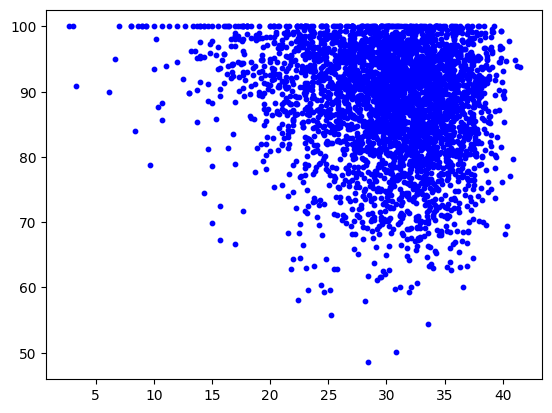

In [122]:
import matplotlib.pyplot as plt

turmas_alunos_ensino_medio_escola_2017['MEDIA ALUNO TURMA'] = turmas_alunos_ensino_medio_escola_2017['QTDE_ALUNOS']/turmas_alunos_ensino_medio_escola_2017['TURMAS']
turmas_alunos_ensino_medio_escola_2017_final = pd.merge(turmas_alunos_ensino_medio_escola_2017, aprovacao_2017[['CD_ESCOLA', 'APR_3']], left_index=True, right_on='CD_ESCOLA')

x = turmas_alunos_ensino_medio_escola_2017_final['MEDIA ALUNO TURMA']
y = turmas_alunos_ensino_medio_escola_2017_final['APR_3']

plt.scatter(x, y, color='blue', marker='o', s=10)